The dataset we are going to use today is **Concrete Compressive Strength Dataset**. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [2]:
concrete = pd.read_csv("Concrete_Data.csv")
concrete.columns = ['cement', 'blast', 'flyash', 'water', 'sp', 'ca', 'fa', 'age', 'ccs']
concrete.head()

,cement,blast,flyash,water,sp,ca,fa,age,ccs
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


More details on this dataset can be found at https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

### Our goal is to predict the concrete compressive strength (ccs) based on other variables in this dataset.

#### First let's start with scatter-plot of ccs and water. Intuitively, does it look like a pure linear association or it seems like there is some sort of non-linearity?

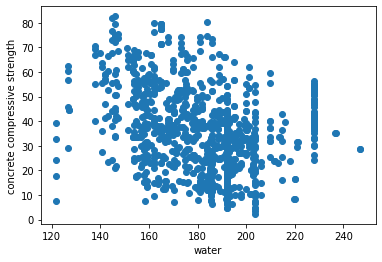

In [3]:
# Scatter plot
plt.scatter(concrete['water'], concrete['ccs'])
plt.xlabel("water")
plt.ylabel("concrete compressive strength")
plt.show()

Answer: Looks like the plots are not random, maybe there is some sort of non-linearity.

#### Now, let's first define few non-linear terms. Start from a pure linear function and go up to polynomial degree 5. 

In [4]:
concrete['water_2'] = concrete['water']**2
concrete['water_3'] = concrete['water']**3
concrete['water_4'] = concrete['water']**4
concrete['water_5'] = concrete['water']**5
X = concrete[['water','water_2','water_3','water_4','water_5']]
y = concrete['ccs']

#### Now divide your dataset into 60% training set 20% validation set, and 20% testing set (use random state 10). Use MSE of validation set to decide which degree of polynomial fits the best. Do you think this is a reasonable model to use? Perform prediction on the test set with the selected degree. What's the final MSE?

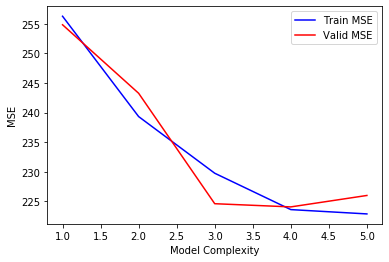

In [5]:
# Dividing training/validation and testing set
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state = 10) 

# Further divide your training/validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, 
                                                      test_size = 0.25, random_state = 10) 
MSE_train = []
MSE_valid = []

lm = LinearRegression()
for i in range(1,6):
    lm.fit(X_train.iloc[:,:i],y_train)
    MSE_train.append(metrics.mean_squared_error(lm.predict(X_train.iloc[:,:i]),y_train))
    MSE_valid.append(metrics.mean_squared_error(lm.predict(X_valid.iloc[:,:i]),y_valid))

# Plot the training and validation error
index = np.array(range(5)) + 1
plt.plot(index, MSE_train, color = 'b', label = "Train MSE")
plt.plot(index, MSE_valid, color = 'r', label = "Valid MSE")
plt.xlabel("Model Complexity")
plt.ylabel("MSE")
plt.legend()
plt.show()


In [6]:
# Perform regression
X4 = concrete[['water','water_2','water_3','water_4']]

X_con = sm.add_constant(X4)
model = sm.OLS(y, X_con).fit()
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ccs   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     61.98
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.19e-47
Time:                        14:37:39   Log-Likelihood:                -4249.7
No. Observations:                1030   AIC:                             8509.
Df Residuals:                    1025   BIC:                             8534.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3608.6392    685.072     -5.268      0.000   -4952.943   -2264.335
water         81.3111     15.688      5.183      0.000      50.527     112.095
water_2       -0.6612      0.133     -4.961      0.000      -0.923      -0.400
water_3        0.0023      0.000      4.679      0.000       0.001       0.003
water_4     -3.01e-06    6.9e-07     -4.361      0.000   -4.36e-06   -1.66e-06
==============================================================================
Omnibus:                       15.024   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.469
Skew:                           0.293   Prob(JB):                     0.000437
Kurtosis:                       2.866   Cond. No.                     1.91e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
# Prediction on test set
lm.fit(X_train_valid.iloc[:,:4], y_train_valid) # We selected polynomial degree 4
metrics.mean_squared_error(lm.predict(X_test.iloc[:,:4]), y_test)

228.50640933720055

Answer: I am not sure if it is the correct model to choose. Because the coefficient of water 4 is quite small, maybe water 3 is enough.

#### Now, try to use different random states. What do you observe?

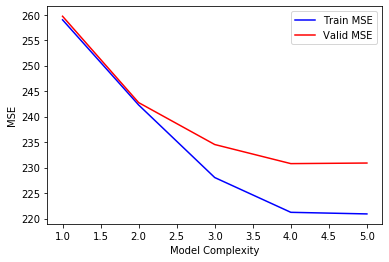

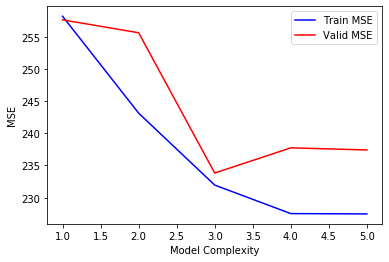

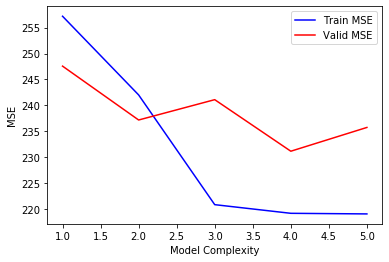

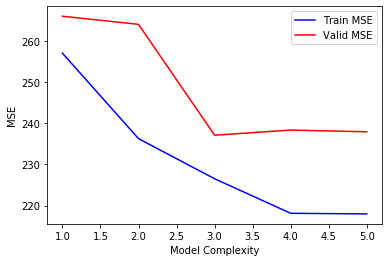

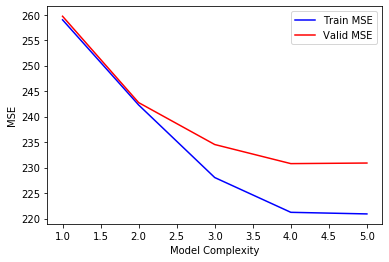

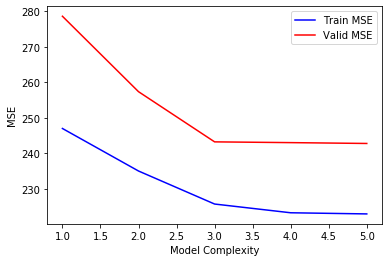

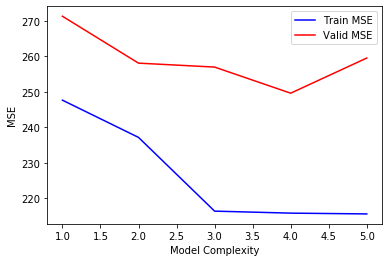

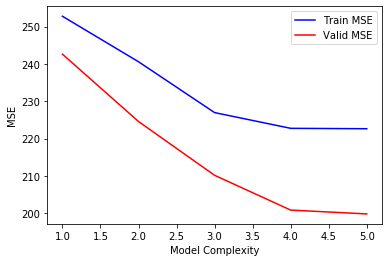

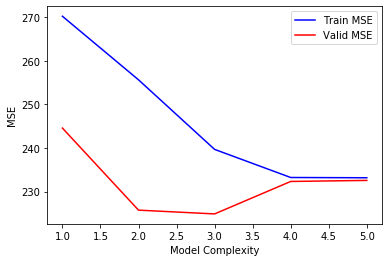

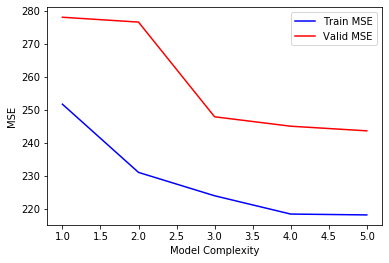

In [8]:
# Write a for loop or function to do 10 runs of the above, each with a different random state
import random
for i in range (0,10):
    a=random.randint(0,1000)

    # Dividing training/validation and testing set
    X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state = a) 

    # Further divide your training/validation set into training and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, 
                                                      test_size = 0.25, random_state = a) 
    MSE_train = []
    MSE_valid = []

    lm = LinearRegression()
    for i in range(1,6):
        lm.fit(X_train.iloc[:,:i],y_train)
        MSE_train.append(metrics.mean_squared_error(lm.predict(X_train.iloc[:,:i]),y_train))
        MSE_valid.append(metrics.mean_squared_error(lm.predict(X_valid.iloc[:,:i]),y_valid))

    # Plot the training and validation error
    index = np.array(range(5)) + 1
    plt.plot(index, MSE_train, color = 'b', label = "Train MSE")
    plt.plot(index, MSE_valid, color = 'r', label = "Valid MSE")
    plt.xlabel("Model Complexity")
    plt.ylabel("MSE")
    plt.legend()
    plt.show()

Answer: The results are quite different.

### Now let's consider more variables.

#### Let's first focus on correlation Matrix.

In [9]:
# Let's first get rid of additional variables we added to our dataframe
del concrete['water_2']
del concrete['water_3']
del concrete['water_4']
del concrete['water_5']

In [10]:
# Correlation matrix (of original data)
concrete.corr()

,cement,blast,flyash,water,sp,ca,fa,age,ccs
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
sp,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
ca,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fa,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
ccs,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


#### List 3 variables that have the highest chance to appear in your final model - the model that can predict ccs. Can these variables appear simultaneously in your final model? Assume your goal is interpretation?

Answer: cement, sp(Superplasticizer), age. Based on my online research, it makes sence. 

#水灰比的影响 粗骨料的影响 混凝土硬化时间即龄期的影响 温度、湿度的影响

### We will now perform both Lasso and Ridge regression on the full data to see what we get.

First split your data into training, validation, and testing sets. Set the random_state to 1 for both splits. Again do a 60%-20%-20% split.

In terms of scaling your data, I want you to do the following. During our in-class exercise, we fit our StandardScalar using our training+validation set together. However, in practice, we should also treat our validation set a 'test set' (to prevent what we called **data leakage**). Hence I want you to do something a bit different here.

When you scale your data, only fit the scale using your TRAINING set, then apply the scale to the validation set. Leave the test set alone for now, we will deal with that later.

In [11]:
# Create a new X and y for the following tasks
X = concrete.copy()
del X['ccs']
y = concrete['ccs']

# Train+Valid / test sets split. Use random_state 1
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state = 1) 

# Train/valid sets split. Use random_state 1
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, 
                                                      test_size = 0.25, random_state = 1) 

# Scale data (only fit with the training data, and transform both the training and validation data)
scaler = StandardScaler() # Instantiate
scaler.fit(X_train) # First fit the data, i.e. learn the mean and sd

X_train = pd.DataFrame(scaler.transform(X_train)) # Then transform the data. We can also use fit_transform
X_valid = pd.DataFrame(scaler.transform(X_valid)) # Transform the validation set

X_train.columns = X.columns.values
X_valid.columns = X.columns.values
print(X_train.mean())
print(X_train.std())
# Remember, the steps are fit, then transform

cement    1.688689e-16
blast    -1.187472e-16
flyash   -1.415624e-16
water     7.236211e-16
sp        1.304243e-16
ca        6.817632e-17
fa        2.658787e-17
age      -9.197964e-17
dtype: float64
cement    1.00081
blast     1.00081
flyash    1.00081
water     1.00081
sp        1.00081
ca        1.00081
fa        1.00081
age       1.00081
dtype: float64


#### Perform Lasso regression. Use the same grids as the in-class example. Which lambda value gives the smallest prediction error on the validation set?

[(1e-10, 109.3348592233276), (1e-09, 109.33485920487199), (1e-08, 109.33485902043091), (1e-07, 109.33485717450783), (1e-06, 109.33483872704359), (1e-05, 109.33465435376564), (0.0001, 109.3328103188507), (0.001, 109.3144999610568), (0.01, 109.14310561123438), (0.1, 108.51867779740218), (1.0, 121.36825997374955), (10.0, 282.14187868109883), (100.0, 282.14187868109883), (1000.0, 282.14187868109883), (10000.0, 282.14187868109883), (100000.0, 282.14187868109883), (1000000.0, 282.14187868109883), (10000000.0, 282.14187868109883), (100000000.0, 282.14187868109883), (1000000000.0, 282.14187868109883), (10000000000.0, 282.14187868109883)]


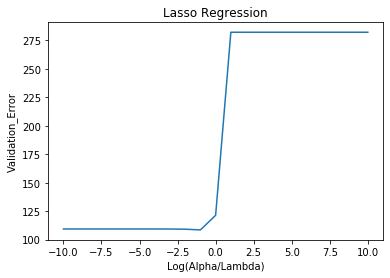

In [12]:
# Lasso regression

# Set up lambda/alpha candidate values 
alphas = np.logspace(-10, 10, 21) # We will use lambda on powers of 10 scale
alphas_index = np.linspace(-10, 10, 21) # The lambda values on log scale

Validation_Scores = []
for a in alphas:
    lm = linear_model.Lasso(alpha=a)
    lm.fit(X_train, y_train) # Fit model on training set
    Validation_Scores.append(metrics.mean_squared_error(lm.predict(X_valid), y_valid)) # Evaluate model on validation set


print(list(zip(alphas, Validation_Scores)))

plt.plot(alphas_index, Validation_Scores)
plt.xlabel("Log(Alpha/Lambda)")
plt.ylabel("Validation_Error")
plt.title("Lasso Regression")
plt.show()

In [13]:
# Find minimum validation error and the corresponding lambda value
min(Validation_Scores)
alphas[np.argmin(Validation_Scores)]

0.1

In [14]:
# Refit Lasso model with selected alpha value
lm1 = linear_model.Lasso(alpha = alphas[np.argmin(Validation_Scores)] )
lm1.fit(X_train, y_train)
print(pd.DataFrame(zip(lm1.coef_,X.columns)))
print("The prediction error on the validation set is", metrics.mean_squared_error(lm1.predict(X_valid), y_valid))

           0       1
0  11.408304  cement
1   7.607861   blast
2   4.388307  flyash
3  -3.645041   water
4   2.248255      sp
5   0.072848      ca
6   0.000000      fa
7   7.297910     age
The prediction error on the validation set is 108.51867779740218


Answer:

Prediction error = 108.51867779740218.

lambda = 0.1

#### Now use the training+validation set, refit the model using the best lambda from above, and perform prediction on the test set. At this point you should scale using both the training+validation data together. What is the prediction error on the test set with this lambda value?

In [15]:
# Scale data (use the train_valid set to fit, then transform both the train_valid set and test set)
scaler = StandardScaler() # Instantiate
scaler.fit(X_train_valid) # First fit the data, i.e. learn the mean and sd

X_train_valid = pd.DataFrame(scaler.transform(X_train_valid)) # Then transform the data. We can also use fit_transform
X_test = pd.DataFrame(scaler.transform(X_test))
# Remember, the steps are fit, then transform

# Refit Lasso model with selected alpha value (0.1 from the lambda we get before)
lm2 = linear_model.Lasso(alpha = 0.1)
lm2.fit(X_train_valid, y_train_valid)
print(pd.DataFrame(zip(lm2.coef_,X.columns)))
print("The prediction error on the testing set is", metrics.mean_squared_error(lm2.predict(X_test), y_test))


           0       1
0  11.154474  cement
1   7.393496   blast
2   4.257816  flyash
3  -4.084364   water
4   2.017821      sp
5   0.000000      ca
6  -0.000000      fa
7   7.079904     age
The prediction error on the testing set is 123.90365131181834


Answer: 

The prediction error on the test set with this lambda value is 123.90365131181834.

In [17]:
# Refit model with train + validation set, perform prediction on test set
# Scale data (use the train_valid set to fit, then transform both the train_valid set and test set)
scaler = StandardScaler() # Instantiate
scaler.fit(X_train,X_valid) # First fit the data, i.e. learn the mean and sd

X_train = pd.DataFrame(scaler.transform(X_train)) # Then transform the data. We can also use fit_transform
X_valid = pd.DataFrame(scaler.transform(X_valid))
# Remember, the steps are fit, then transform
X3 = pd.concat([X_train, X_valid])
Y3 = pd.concat([y_train, y_valid])
# Combine X_train and X_valid, and their Ys

# Refit Lasso model with selected alpha value (0.1 from the lambda we get before)
lm3 = linear_model.Lasso(alpha = 0.1)
lm3.fit(X3, Y3)
print(pd.DataFrame(zip(lm3.coef_,X.columns)))
print("The prediction error on the test set is", metrics.mean_squared_error(lm3.predict(X_test), y_test))


           0       1
0  11.023836  cement
1   7.435473   blast
2   4.237219  flyash
3  -4.028812   water
4   1.975620      sp
5   0.000000      ca
6  -0.000000      fa
7   7.579947     age
The prediction error on the test set is 126.08203968658492


Answer: 

The prediction error on the test set with this lambda value is 126.08203968658492.

#### What do you observe from the coefficients?

Answer: 

The result of train + test, will be better than train_test because the prediction error is lower. 

#### Now perform the same task with ridge regression. Which lambda value gives the smallest prediction error on the validation set?

[(1e-10, 109.33485922534639), (1e-09, 109.33485922507496), (1e-08, 109.3348592223603), (1e-07, 109.33485919521344), (1e-06, 109.33485892374522), (1e-05, 109.33485620906636), (0.0001, 109.33482906263274), (0.001, 109.33455763374461), (0.01, 109.33184688686947), (0.1, 109.3050907681439), (1.0, 109.07000601476261), (10.0, 108.44624825507825), (100.0, 115.3730917111119), (1000.0, 175.08903759042846), (10000.0, 261.16464690835284), (100000.0, 279.8344143526139), (1000000.0, 281.9088195656453), (10000000.0, 282.1185494058706), (100000000.0, 282.1395455197), (1000000000.0, 282.14164536261995), (10000000000.0, 282.1418553492276)]


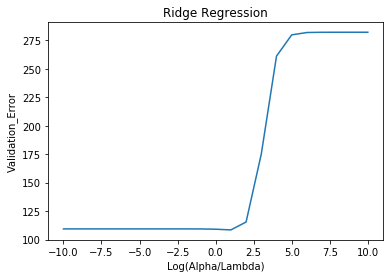

In [18]:
# Ridge regression

# Set up lambda/alpha candidate values 
alphas = np.logspace(-10, 10, 21) # We will use lambda on powers of 10 scale
alphas_index = np.linspace(-10, 10, 21) # The lambda values on log scale

Validation_Scores = []
for a in alphas:
    lm = linear_model.Ridge(alpha=a)
    lm.fit(X_train, y_train) # Fit model on training set
    Validation_Scores.append(metrics.mean_squared_error(lm.predict(X_valid), y_valid)) # Evaluate model on validation set


print(list(zip(alphas, Validation_Scores)))

plt.plot(alphas_index, Validation_Scores)
plt.xlabel("Log(Alpha/Lambda)")
plt.ylabel("Validation_Error")
plt.title("Ridge Regression")
plt.show()


In [19]:
# Find minimum validation error and the corresponding lambda value
min(Validation_Scores)
alphas[np.argmin(Validation_Scores)]

10.0

In [20]:
# Refit Lasso model with selected alpha value
lm1 = linear_model.Ridge(alpha = alphas[np.argmin(Validation_Scores)] )
lm1.fit(X_train, y_train)
print(pd.DataFrame(zip(lm1.coef_,X.columns)))
print("The prediction error on the validation set is", metrics.mean_squared_error(lm1.predict(X_valid), y_valid))

           0       1
0  11.291365  cement
1   7.561269   blast
2   4.287497  flyash
3  -3.532789   water
4   2.467653      sp
5   0.231176      ca
6   0.033577      fa
7   7.288471     age
The prediction error on the validation set is 108.44624825507825


Answer:

Prediction error = 108.44624825507826.

lambda = 10.

#### What is the prediction error on the test set with this lambda value?

In [21]:
# Refit model with train + validation set, perform prediction on test set

# Scale data (use the train_valid set to fit, then transform both the train_valid set and test set)
scaler = StandardScaler() # Instantiate
scaler.fit(X_train,X_valid) # First fit the data, i.e. learn the mean and sd

X_train = pd.DataFrame(scaler.transform(X_train)) # Then transform the data. We can also use fit_transform
X_valid = pd.DataFrame(scaler.transform(X_valid))
# Remember, the steps are fit, then transform
X4 = pd.concat([X_train, X_valid])
Y4 = pd.concat([y_train, y_valid])
# Combine X_train and X_valid, and their Ys

# Refit Ridge model with selected alpha value (0.1 from the lambda we get before)
lm4 = linear_model.Ridge(alpha = 10)
lm4.fit(X4, Y4)
print(pd.DataFrame(zip(lm4.coef_,X.columns)))
print("The prediction error on the test set is", metrics.mean_squared_error(lm4.predict(X_test), y_test))


           0       1
0  11.157827  cement
1   7.618309   blast
2   4.372371  flyash
3  -3.853091   water
4   2.125114      sp
5   0.245971      ca
6   0.158781      fa
7   7.610479     age
The prediction error on the test set is 126.12736121130854


Answer: 

The prediction error on the test set with this lambda value is 126.12736121130852.

#### What do you observe from the coefficients?

Answer: 

All the coefficients are not equal to zero.

#### Now fit the regression model using the statsmodel library (use only the train+valid data set). Perform prediction on the test set. What is the prediction error?

In [22]:
# Fit model (remember to add the intercept)
# Scale data (use the train_valid set to fit, then transform both the train_valid set and test set)
scaler = StandardScaler() # Instantiate
scaler.fit(X_train,X_valid) # First fit the data, i.e. learn the mean and sd

X_train = pd.DataFrame(scaler.transform(X_train)) # Then transform the data. We can also use fit_transform
X_valid = pd.DataFrame(scaler.transform(X_valid))
# Remember, the steps are fit, then transform
X5 = pd.concat([X_train, X_valid])
X5.columns = ['cement','blast','flyash','water','sp','ca','fa','age'] 
X5.index = range(824)
Y5 = pd.concat([y_train, y_valid])
Y5.index = range(824)
# Combine X_train and X_valid, and their Ys

# Prediction
X_con = sm.add_constant(X5)
model = sm.OLS(Y5, X_con).fit()
#predictions = model.predict(X_test)
model.summary()


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ccs   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     176.3
Date:                Mon, 09 Mar 2020   Prob (F-statistic):          5.01e-172
Time:                        14:40:25   Log-Likelihood:                -3080.6
No. Observations:                 824   AIC:                             6179.
Df Residuals:                     815   BIC:                             6222.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6694      0.357     99.967      0.000      34.969      36.370
cement        12.8213      0.950     13.490      0.000      10.956      14.687
blast          9.2455      0.941      9.825      0.000       7.398      11.093
flyash         5.8369      0.875      6.671      0.000       4.120       7.554
water         -2.8532      0.884     -3.226      0.001      -4.589      -1.117
sp             2.0480      0.588      3.483      0.001       0.894       3.202
ca             1.3295      0.784      1.696      0.090      -0.209       2.868
fa             1.5612      0.917      1.703      0.089      -0.238       3.361
age            7.7925      0.398     19.602      0.000       7.012       8.573
==============================================================================
Omnibus:                        9.843   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.823
Skew:                          -0.256   Prob(JB):                      0.00736
Kurtosis:                       3.156   Cond. No.                         8.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X_test = sm.add_constant(X_test)
prediction = model.predict(X_test)

Text(0, 0.5, 'Prediction')

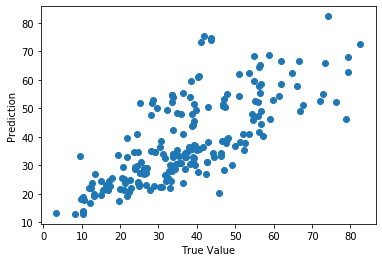

In [24]:
plt.scatter(y_test, prediction)
plt.xlabel('True Value')
plt.ylabel('Prediction')

In [25]:
print("The prediction error on the test set is", metrics.mean_squared_error(model.predict(X_test), y_test))

The prediction error on the test set is 127.09137011149679


Answer: 

The prediction error on the test set with this lambda value is 127.091370111497.

#### Between these three models, which model gives the best prediction result?

Answer: 

 Lasso regression